In [1]:
!sudo apt-get install openslide-tools -y
!sudo apt-get install python-openslide -y
!pip install openslide-python
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openslide-tools is already the newest version (3.4.1+dfsg-5).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-openslide


In [2]:
!pip install keras_preprocessing

In [3]:
import numpy as np
import pandas as pd
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
from PIL import Image
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from tensorflow.keras.applications import  ResNet50, MobileNet, MobileNetV2, VGG19, InceptionV3, EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import datasets, layers, models

import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import random
from tensorflow.keras.regularizers import l2



import cv2
from tqdm.notebook import tqdm
import keras_preprocessing.image as IMAGE
from PIL import Image
from sklearn.model_selection import train_test_split

2024-07-19 14:48:02.157499: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-19 14:48:07.453073: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/envs/tensorflow/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2024-07-19 14:48:07.455242: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or director

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17650710032988155812
xla_global_id: -1
]


2024-07-19 14:48:13.816453: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-07-19 14:48:13.816521: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (instance-20230726-182811): /proc/driver/nvidia/version does not exist


In [4]:
path='/home/jupyter/Patch_extraction/'
base = '/home/jupyter/Patch_extraction/'

In [5]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [6]:
# def patch_selection(ids, i):
#     data = []

#     for id in tqdm(ids):
#         try:
#             files1 = os.listdir(os.path.join(base, str(i), id))
#             # Select all files
#             selected_files = files1

#             for x in selected_files:
#                 data.append(os.path.join(base, str(i), id, x))
#         except FileNotFoundError:
#             pass
        
#     return data 

In [7]:
# def patch_selection(ids,i):
#     data = []

#     for id in tqdm(ids):
#         try:
#             files1 = os.listdir(os.path.join(base+'/'+str(i)+'/', id))
#             # Randomly select 100 images if there are more than 100
#             if len(files1) > 100:
#                 selected_files = random.sample(files1, 100)
#             else:
#                 selected_files = files1

#             for x in selected_files:
#                 data.append(os.path.join(base+'/'+str(i)+'/', id, x))
#         except FileNotFoundError:
#             pass
        
#     return data 


def patch_selection(ids, i):
    data = []
    labels = []

    for id in tqdm(ids):
        try:
            files1 = os.listdir(os.path.join(base, str(i), id))
            # Randomly select 100 images if there are more than 100
            # if len(files1) > 100:
            #     selected_files = random.sample(files1, 100)
            # else:
            selected_files = files1

            for x in selected_files:
                data.append(os.path.join(base, str(i), id, x))
                labels.append(i)  # Append the class label based on the folder name
        except FileNotFoundError:
            pass

    return data, labels


In [8]:
# import os
# import random
# from sklearn.model_selection import train_test_split

# train_patch_ids = []
# test_patch_ids = []

# for i in range(0,17):

#     # List all file IDs in the directory
#     ids = os.listdir(base + '/' + str(i) + '/')
    
#     # Ensure at most 10 slides are selected
#     if len(ids) > 10:
#         ids = random.sample(ids, 10)
        
#     print(i)
#     print(ids)
#     print('\n')
    
#     # Split the IDs into training and validation sets
#     train_ids, test_ids = train_test_split(ids, test_size=0.2, random_state=42)
    
#     # print(train_ids)
    
#     # Assuming patch_selection function selects patches from given ids and class index
#     train_patch_id = patch_selection(train_ids, i)
#     test_patch_id = patch_selection(test_ids, i)
    
#     train_patch_ids.extend(train_patch_id)
#     test_patch_ids.extend(test_patch_id)
    

    
import os
import random
from sklearn.model_selection import train_test_split


train_patch_ids = []
train_labels = []
test_patch_ids = []
test_labels = []

for i in range(0, 17):
    # List all file IDs in the directory
    ids = os.listdir(base + '/' + str(i) + '/')
    
    # Ensure at most 10 slides are selected
    if len(ids) > 10:
        ids = random.sample(ids, 10)
        
    print(i)
    print(ids)
    print('\n')
    
    # Split the IDs into training and validation sets
    train_ids, test_ids = train_test_split(ids, test_size=0.2, random_state=42)
    
    # Assuming patch_selection function selects patches from given ids and class index
    train_patch_id, train_label = patch_selection(train_ids, i)
    test_patch_id, test_label = patch_selection(test_ids, i)
    
    train_patch_ids.extend(train_patch_id)
    train_labels.extend(train_label)
    test_patch_ids.extend(test_patch_id)
    test_labels.extend(test_label)
   

0
['76592', '77147', '77316', '76930', '76590', '76328', '78415', '76693', '76529', '76591']




  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

1
['76936', '76973', '78100', '78630', '76520', '76849', '78775', '76470', '76647', '77496']




  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

2
['78336', '77233', '78408', '78705', '78386', '76859', '78400', '76925', '77384', '78687']




  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

3
['76767', '76516', '76779', '76787', '76549', '76702', '76330', '76430', '76768', '76343']




  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

4
['76974', '78688', '76505', '77000', '76462', '76523', '76402', '78616', '76850', '77095']




  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

5
['77621', '78760', '76556', '77326', '77529', '76558', '76580', '77155', '76555', '76884']




  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

6
['76603', '78555', '76588', '76939', '76962', '76454', '77184', '76736', '76426', '77283']




  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

7
['76957', '76351', '77082', '78734', '76991', '78457', '77023', '77099', '76881', '77522']




  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

8
['77334', '77022', '77238', '77098', '76970', '76509', '76457', '76398', '77183', '77501']




  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

9
['76747', '76649', '77081', '77336', '76720', '77159', '77411', '76538', '76494', '76466']




  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

10
['78431', '77451', '78438', '78105', '77254', '76582', '78432', '77450']




  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

11
['77435', '77029', '76585', '77028', '76475', '76897', '77030']




  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

12
['76640', '76989', '76605', '78567', '77037', '76620', '78461', '78370', '78629', '76424']




  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

13
['78456', '78371', '78542', '77053', '76679', '76678', '77372', '77113', '78372', '77360']




  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

14
['78106', '76622', '78602', '77395', '76623', '77230', '76446', '78407', '78406', '78470']




  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

15
['76569', '76384', '76633', '76318', '77008', '78605', '77021', '76570', '77423']




  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

16
['76431', '77073', '78540', '76636', '76432', '76634', '76635', '78537', '76445']




  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [9]:
print(len(train_patch_ids))
print(len(test_patch_ids))

363953
89284


In [10]:
# import numpy as np
# import keras

# class DataGenerator(tf.keras.utils.Sequence):
#     'Generates data for Keras'
#     def __init__(self, list_IDs, batch_size=128, dim=(512,512), n_channels=3,
#                  n_classes=17, shuffle=True):
#         'Initialization'
#         self.dim = dim
#         self.batch_size = batch_size
#         # self.labels = labels
#         self.list_IDs = list_IDs
#         self.n_channels = n_channels
#         self.n_classes = n_classes
#         self.shuffle = shuffle
#         self.on_epoch_end()

#     def __len__(self):
#         'Denotes the number of batches per epoch'
#         return int(np.floor(len(self.list_IDs) / self.batch_size))

#     def __getitem__(self, index):
#         'Generate one batch of data'
#         # Generate indexes of the batch
#         indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

#         # Find list of IDs
#         list_IDs_temp = [self.list_IDs[k] for k in indexes]

#         # Generate data
#         X, y = self.__data_generation(list_IDs_temp)

#         return X, y

#     def on_epoch_end(self):
#         'Updates indexes after each epoch'
#         self.indexes = np.arange(len(self.list_IDs))
#         if self.shuffle == True:
#             np.random.shuffle(self.indexes)

#     def __data_generation(self, list_IDs_temp):
#         'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
#         # Initialization
#         X = np.empty((self.batch_size, *self.dim, self.n_channels))
#         y = np.empty((self.batch_size), dtype=int)

#         # print(list_IDs_temp)

#         # Generate data
#         for i, ID in enumerate(list_IDs_temp):
#             # print(i)
#             # Store sample
#             X[i,] = IMAGE.img_to_array(IMAGE.load_img(ID, target_size=(512, 512)))

#             # Store class
#             y[i] = int(ID[-5])

#         return X, to_categorical(y, num_classes=self.n_classes)

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image as IMAGE

class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=128, dim=(512, 512), n_channels=3,
                 n_classes=17, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        labels_temp = [self.labels[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp, labels_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp, labels_temp):
        'Generates data containing batch_size samples'  # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, (ID, label) in enumerate(zip(list_IDs_temp, labels_temp)):
            # Store sample
            X[i,] = IMAGE.img_to_array(IMAGE.load_img(ID, target_size=(512, 512)))

            # Store class
            y[i] = label

        return X, to_categorical(y, num_classes=self.n_classes)


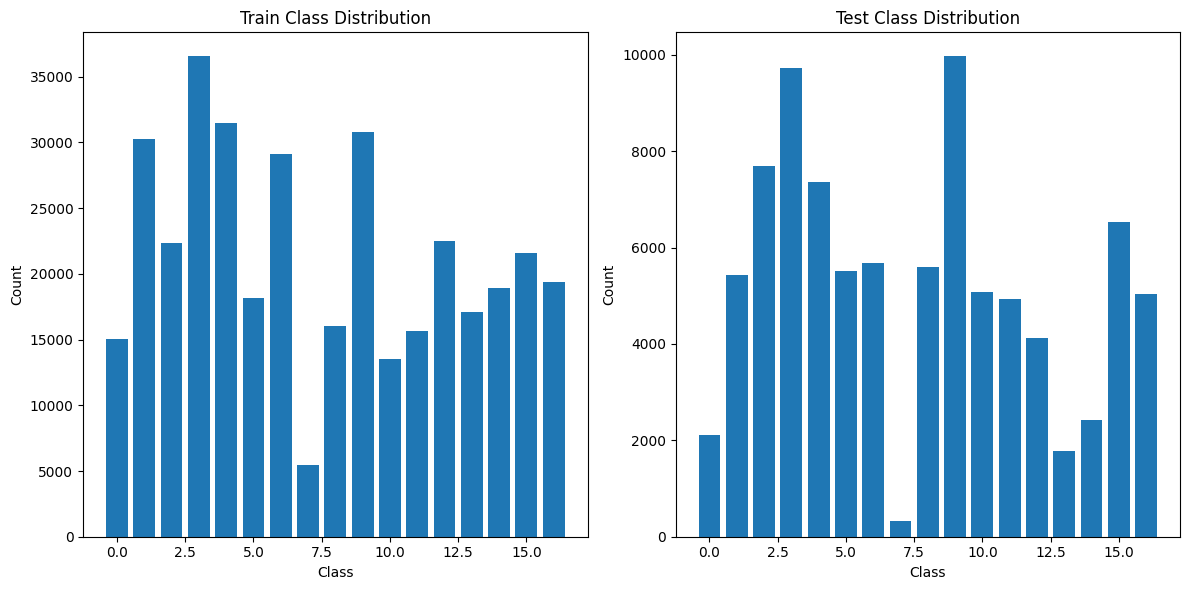

Train class distribution: [15067. 30289. 22370. 36547. 31476. 18125. 29083.  5451. 16045. 30794.
 13524. 15624. 22535. 17112. 18920. 21581. 19410.]
Test class distribution: [2104. 5437. 7681. 9721. 7362. 5517. 5678.  329. 5600. 9966. 5079. 4932.
 4126. 1772. 2413. 6536. 5031.]


In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt

def get_class_distribution_from_filenames(filenames, custom_classes):
    class_counts = np.zeros(len(custom_classes))
    class_map = {cls: idx for idx, cls in enumerate(custom_classes)}
    
    for filename in filenames:
        # Extract class label from the directory name
        class_label = int(os.path.basename(os.path.dirname(os.path.dirname(filename))))
        if class_label in class_map:
            class_counts[class_map[class_label]] += 1
    
    return class_counts

# Define your custom range of class labels
custom_range = list(range(0, 17))

# Assuming train_patch_ids and test_patch_ids are lists of image paths for training and testing
train_class_distribution = get_class_distribution_from_filenames(train_patch_ids, custom_range)
test_class_distribution = get_class_distribution_from_filenames(test_patch_ids, custom_range)

# Plotting class distributions
classes = np.array(custom_range)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(classes, train_class_distribution)
plt.title('Train Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(classes, test_class_distribution)
plt.title('Test Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print distributions as arrays
print("Train class distribution:", train_class_distribution)
print("Test class distribution:", test_class_distribution)


In [13]:
train_IDs, val_IDs, train_labels, val_labels = train_test_split(train_patch_ids, train_labels, test_size=0.2, random_state=42)

In [14]:
import gc
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [15]:
# y = np.array(labels_1)
# x = np.stack(images_1)/255

In [16]:

# x_train_1,x_test,y_train_1,y_test = train_test_split(x, y, random_state=0, test_size=0.2)
# x_train,x_val,y_train,y_val = train_test_split(x_train_1, y_train_1, random_state=0, test_size=0.2)
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# y_val = to_categorical(y_val)

# print(y_train.shape)

In [17]:
def freezing_layers(model_name):
    for layer in model_name.layers:
      layer.trainable = False
def trainable_layers(model_name):
    for layer in model_name.layers:
      layer.trainable = True

In [18]:
### Data
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images



In [19]:

# Initialize the DataGenerators
training_generator = DataGenerator(train_IDs, train_labels, batch_size=128, n_classes=17, shuffle=True)
valid_generator = DataGenerator(val_IDs, val_labels, batch_size=128, n_classes=17, shuffle=False)
test_generator = DataGenerator(test_patch_ids, test_labels, batch_size=128, n_classes=17, shuffle=False)


In [20]:
## ResNet-50 Model ###

base_model =  EfficientNetB0(input_shape=(512,512,3),weights='imagenet', include_top=False)
#ResNet50_base_model.summary()

#freezing layers
freezing_layers(base_model)

model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=l2(0.001)))  # L2 regularization
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(17, activation ='softmax'))
#ResNet50_model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# history = ResNet50_model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 20, verbose = 2, batch_size = 4)

history =  model.fit(training_generator,
                    epochs=2,
                    # steps_per_epoch=32,
                    # callbacks= callbacks,
                    validation_data = valid_generator
                    )

#ResNet50_model.evaluate(x_test,y_test)

Epoch 1/2
  27/2274 [..............................] - ETA: 9:24:15 - loss: 17.1463 - accuracy: 0.5136

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_generator)

691/697 [============================>.] - ETA: 1:11 - loss: 28.3748 - accuracy: 0.3704

In [ ]:
y_test=[]
y_pred=[]
i=0
for i in range (len(test_generator)):
    x_test,y_test_1=test_generator[i]
    y_pred_1=model.predict(x_test)
    y_test.append(y_test_1)
    y_pred.append(y_pred_1)
    i=i+1


4/4 [==============================] - 12s 3s/step


In [ ]:
y_test_2=np.array(y_test)
Y_test=y_test_2.reshape((y_test_2.shape[0]*y_test_2.shape[1], y_test_2.shape[2]))
print(Y_test.shape)

In [ ]:
y_pred_2=np.array(y_pred)
Y_pred=y_pred_2.reshape((y_pred_2.shape[0]*y_pred_2.shape[1], y_pred_2.shape[2]))
print(Y_pred.shape)

In [ ]:

# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.legend(['train', 'val'], loc='upper left')
# # plt.show()
# plt.savefig(path+'accuracy.png')
# plt.clf()

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.legend(['train', 'val'], loc='upper left')
# # plt.show()
# plt.savefig(path+'loss.png')
# plt.clf()



from sklearn.metrics import confusion_matrix
import seaborn as sns

#Y_pred = ResNet50_model.predict(x_test)
# Y_pred = model.predict(x_test)

# Y_pred = model.predict(test_generator)

Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_test,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

print(confusion_mtx)

total_instances = np.sum(confusion_mtx,axis=1)


confusion_matrix_percentages = []

for i in range(17):
    confusion_matrix_percentages_1 = (confusion_mtx[i, :] / total_instances[i]) * 100
    confusion_matrix_percentages.append(confusion_matrix_percentages_1)

confusion_matrix_percentages = np.array(confusion_matrix_percentages)

np.set_printoptions(suppress=True, precision=2)

print(confusion_matrix_percentages)


f,ax = plt.subplots(figsize=(17, 17))
sns.heatmap(confusion_matrix_percentages, annot=True, linewidths=0.01,cmap="OrRd",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
# plt.savefig(path+'Confusion_matrix.png')
# plt.clf()

from sklearn.metrics import classification_report

report = classification_report(Y_true, Y_pred_classes, output_dict=True)
df = pd.DataFrame(report).transpose()

#df.to_csv(path+'classification_report.csv', sep='\t')


print(classification_report(Y_true, Y_pred_classes))



###############################################################################################################################################
# class_labels = ['HS-TO','TO-MWF','MWF-HS']

# # Create a heatmap
# plt.figure(figsize=(5, 5))
# sns.set(font_scale=1.25)  # Adjust the font size as needed
# sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)

# # Get the current Axes instance
# ax = plt.gca()

# # # Set all the text in the heatmap to bold
# # for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
# #              ax.get_xticklabels() + ax.get_yticklabels()):
# #     item.set_fontweight('bold')

# # Customize the heatmap (optional)
# plt.xlabel('Predicted Label')
# plt.gca().set_xticklabels(class_labels, rotation=0, ha='center', fontsize=12, fontweight='bold')  # Customize x-axis labels
# # sns.heatmap.tick_params(axis='x', pad=10)



# plt.ylabel('True Label')
# plt.gca().set_yticklabels(class_labels, rotation=90, ha='right', fontsize=12, fontweight='bold')  # Customize y-axis labels

# # plt.title('Confusion Matrix')
# plt.show()
